# Z3 SAT Exercises

In [1]:
# !pip3 install z3-solver

In [2]:
from itertools import combinations
from z3 import *
from utils import *

## Useful contraints

In [3]:
def at_least_one(bool_vars):
    return Or(bool_vars)

def at_most_one(bool_vars):
    return And([Not(And(a, b)) for a, b in combinations(bool_vars, 2)])

def exactly_one(bool_vars):
    return And(at_least_one(bool_vars),(at_most_one(bool_vars)))

## Knights and Knaves

In [4]:
# Which are the variables?

# A holds if A is a knight
# A == False if a is a knave
A = Bool('A')
B = Bool('B')

s = Solver()

# Encode A's statement
statement = Or(Not(A), B)
# If A is a knight, then A's statement is true
s.add(Implies(A, statement))
# If A is a knave, then A's statement is a lie
s.add(Implies(Not(A), Not(statement)))

# Unicity check

# Check model is sat
if s.check() == sat:
    print(s.model())
else:
    print("No SAT")

[A = True, B = True]


## Coloring graph

Another famous problem is the [coloring graph](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjAlpGV4az2AhUP2aQKHY_5BQwQFnoECAQQAQ&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FGraph_coloring&usg=AOvVaw0F_XS2AN3uz4G-IJx5Q8j0). 

Given a graph $({v_1,...,v_n},E)$ and $d$ colors, we need to assign a color to each vertex, s.t. if $(v_i,v_j) ∈ E$ then color of $v_i$ is different from color of $v_j$. 

In [5]:
def coloring_graph_sat(n, d, E):
    # Create the variables, x_i_j = 1 iff vertex i is colored with color j.
    v = [[Bool(f'x_{i}_{j}') for j in range(d)] for i in range(n)]
    # Solver instance
    s = Solver()
    # Each vertex has at least one color 
    for i in range(n):
        s.add(at_least_one(v[i]))
    # Each edge must have different colors in its vertices
    for i,j in E:
        for k in range(d):
            s.add(Not(And(v[i][k], v[j][k])))
    # Check model
    if s.check() == sat:
        m = s.model()
        return [(i,j) for j in range(d) for i in range (n) if m.evaluate(v[i][j])]
    else:
        print("No SAT")
        

In [6]:
instance1 = {
        "n" : 5,
        "d": 3,
        "E" : [
            (0, 2),
            (0, 4),
            (1, 2),
            (1, 4),
            (2, 3), 
            (3, 4)
        ]
    }
instance2 = {
        "n":10,
        "d":3,
        "E":[
            (0, 1),
            (0, 4),
            (0, 5),
            (1, 2),
            (1, 6),
            (2, 7),
            (2, 3),
            (3, 8),
            (3, 4),
            (4, 9),
            (9, 6),
            (9, 7),
            (6, 8),
            (5, 7),
            (5, 8), 
        ]
}

In [7]:
instance = instance2

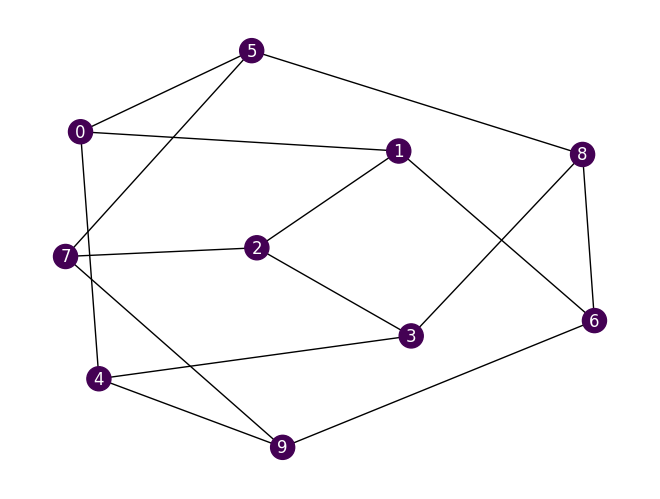

In [8]:
display_color_graph(E = instance["E"])

CPU times: user 65.9 ms, sys: 455 µs, total: 66.4 ms
Wall time: 65.4 ms


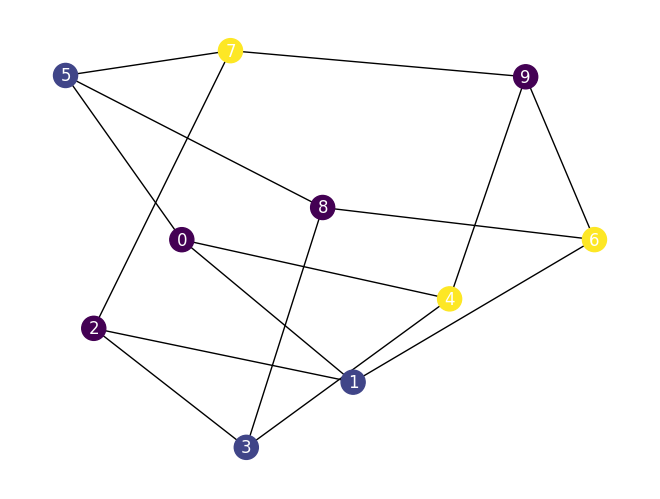

In [9]:
%%time
display_color_graph(sol = coloring_graph_sat(instance["n"], instance["d"], instance["E"]), E = instance["E"])

## N-Queens

The [n-queens problem](https://en.wikipedia.org/wiki/Eight_queens_puzzle) is the problem of placing n chess queens in a $nxn$ chessboard so that no two queens threaten each other. In light of this, the solution requires that no two queens share the same row, column, or diagonal.

In [10]:
def nqueens_sat(n):
    # Create all the variables
    # c_i_j = 1 iff there is a queen in the cell (i,j)
    c = [[Bool(f'x_{i}_{j}') for j in range(n)] for i in range(n)]
    # Create the solver instance
    s = Solver()
    # At least one on each row and column
    for i in range(n):
        s.add(at_least_one(c[i]))
        s.add(at_least_one([c[j][i] for j in range(n)]))
    # At most one on each row and column
    for i in range(n):
        s.add(at_most_one(c[i]))
        s.add(at_most_one([c[j][i] for j in range(n)]))
    # We can enhance this model by using the exactly one constraint instead of using two different constraints
    # Add the diagonal constraints
    for i in range(n-1):
        diag_ru = []
        diag_rl = []
        diag_lu = []
        diag_ll = []
        for j in range(n-i):
            diag_ru.append(c[n-1-(i+j)][n-1-j])
            diag_rl.append(c[n-1-(i+j)][j])
            diag_lu.append(c[i+j][j])
            diag_ll.append(c[i+j][n-1-j])
        s.add(at_most_one(diag_ru))
        s.add(at_most_one(diag_rl))
        s.add(at_most_one(diag_lu))
        s.add(at_most_one(diag_ll))
    # Check model 
    if s.check() == sat:
        m = s.model()
        return [(i,j) for j in range(n) for i in range(n) if m.evaluate(c[i][j])]
    else:
        print("No SAT")

In [11]:
%%time
display_nqueens(nqueens_sat(20))

. . . . . . ♛ . . . . . . . . . . . . . 
. . . . . . . . . . ♛ . . . . . . . . . 
. . . . . . . . . . . . . ♛ . . . . . . 
. . . . . . . . . . . . . . . . . . . ♛ 
. . . . . . . . . . . . ♛ . . . . . . . 
. . . . . . . . . . . . . . . ♛ . . . . 
. . . . . . . . . . . ♛ . . . . . . . . 
. ♛ . . . . . . . . . . . . . . . . . . 
. . . . ♛ . . . . . . . . . . . . . . . 
♛ . . . . . . . . . . . . . . . . . . . 
. . . ♛ . . . . . . . . . . . . . . . . 
. . . . . . . . ♛ . . . . . . . . . . . 
. . ♛ . . . . . . . . . . . . . . . . . 
. . . . . ♛ . . . . . . . . . . . . . . 
. . . . . . . . . ♛ . . . . . . . . . . 
. . . . . . . . . . . . . . ♛ . . . . . 
. . . . . . . . . . . . . . . . ♛ . . . 
. . . . . . . . . . . . . . . . . . ♛ . 
. . . . . . . ♛ . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . ♛ . . 
CPU times: user 2.37 s, sys: 9.18 ms, total: 2.38 s
Wall time: 2.38 s


## Sudoku

[Sudoku](https://en.wikipedia.org/wiki/Sudoku) is a logic-based, combinatorial number-placement puzzle. In classic sudoku, the objective is to fill a 9 × 9 grid with digits so that each column, each row, and each of the nine 3 × 3 subgrids that compose the grid contain all of the digits from 1 to 9. 

In [12]:
# Sudoku instances, '0's correspond to empty cells

instance1 = ((0, 0, 0, 0, 9, 4, 0, 3, 0),
             (0, 0, 0, 5, 1, 0, 0, 0, 7),
             (0, 8, 9, 0, 0, 0, 0, 4, 0),
             (0, 0, 0, 0, 0, 0, 2, 0, 8),
             (0, 6, 0, 2, 0, 1, 0, 5, 0),
             (1, 0, 2, 0, 0, 0, 0, 0, 0),
             (0, 7, 0, 0, 0, 0, 5, 2, 0),
             (9, 0, 0, 0, 6, 5, 0, 0, 0),
             (0, 4, 0, 9, 7, 0, 0, 0, 0))

instance2 = ((0, 0, 0, 0, 9, 0, 1, 0, 0),
             (2, 8, 0, 0, 0, 5, 0, 0, 0),
             (7, 0, 0, 0, 0, 6, 4, 0, 0),
             (8, 0, 5, 0, 0, 3, 0, 0, 6),
             (0, 0, 1, 0, 0, 4, 0, 0, 0),
             (0, 7, 0, 2, 0, 0, 0, 0, 0),
             (3, 0, 0, 0, 0, 1, 0, 8, 0),
             (0, 0, 0, 0, 0, 0, 0, 5, 0),
             (0, 9, 0, 0, 0, 0, 0, 7, 0))

instance3 = ((0, 7, 0, 0, 0, 0, 0, 4, 9),
             (0, 0, 0, 4, 0, 0, 0, 0, 0),
             (4, 0, 3, 5, 0, 7, 0, 0, 8),
             (0, 0, 7, 2, 5, 0, 4, 0, 0),
             (0, 0, 0, 0, 0, 0, 8, 0, 0),
             (0, 0, 4, 0, 3, 0, 5, 9, 2),
             (6, 1, 8, 0, 0, 0, 0, 0, 5),
             (0, 9, 0, 1, 0, 0, 0, 3, 0),
             (0, 0, 5, 0, 0, 0, 0, 0, 7))

instance4 = ((0, 0, 0, 0, 0, 6, 0, 0, 0),
             (0, 5, 9, 0, 0, 0, 0, 0, 8),
             (2, 0, 0, 0, 0, 8, 0, 0, 0),
             (0, 4, 5, 0, 0, 0, 0, 0, 0),
             (0, 0, 3, 0, 0, 0, 0, 0, 0),
             (0, 0, 6, 0, 0, 3, 0, 5, 4),
             (0, 0, 0, 3, 2, 5, 0, 0, 6),
             (0, 0, 0, 0, 0, 0, 0, 0, 0),
             (0, 0, 0, 0, 0, 0, 0, 0, 0))

instance5 = ((0,0,0,0,0,0,0,0,0),
             (0,0,0,0,0,0,0,0,0),
             (0,0,0,0,0,0,0,0,0),
             (0,0,0,0,0,0,0,0,0),
             (0,0,0,0,0,0,0,0,0),
             (0,0,0,0,0,0,0,0,0),
             (0,0,0,0,0,0,0,0,0),
             (0,0,0,0,0,0,0,0,0),
             (0,0,0,0,0,0,0,0,0))

In [13]:
def sudoku_sat(instance):
    s = Solver()
    # All the variables we need: for each cell, nine variables that determine which digit must be assigned.
    v = [[[Bool('v_%s_%s_%s' % (i, j, k)) for k in range(1,10)] for j in range(9)] for i in range(9)]
    # A cell has only one value
    for i in range(9):
        for j in range(9):
            s.add(exactly_one(v[i][j]))
    # Each value is used only once in a row
    for i in range(9):
        for k in range(9):
            s.add(exactly_one([v[i][j][k] for j in range(9)]))
    # Each value used exactly once in each column
    for j in range(9):
        for k in range(9):
            s.add(exactly_one([v[i][j][k] for i in range(9)]))
    # Each value used exactly once in each 3x3 grid.
    for i in range(3):
        for j in range(3):
            for k in range(9):
                s.add(exactly_one([v[3*i+a][3*j+b][k] for a in range(3) for b in range(3)]))
    # Some numbers are already available
    for i in range(9):
        for j in range(9):
            if instance[i][j] != 0:
                s.add(v[i][j][instance[i][j]-1])
    # Check model
    if s.check() == sat:
        m = s.model()
        # return np.array([[k+1 for i in range(9) for j in range(9) for k in range(9) if m.evaluate(v[i][j][k])]]).reshape(9,9)
        return [[k+1 for j in range(9) for k in range(9) if m.evaluate(v[i][j][k])] for i in range(9)]
    else:
        return None

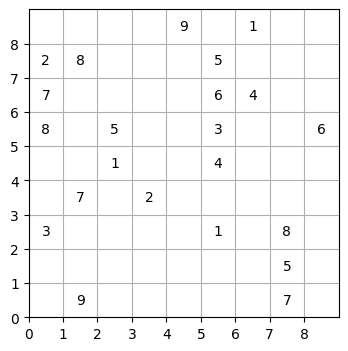

In [14]:
# Select the instance you want to solve
instance = instance2
display_sudoku(instance)

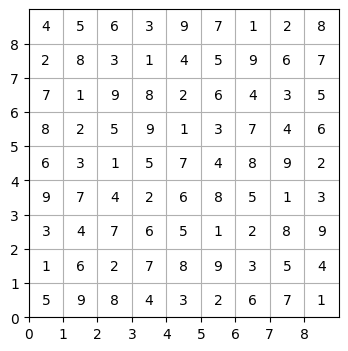

CPU times: user 3.5 s, sys: 64.3 ms, total: 3.56 s
Wall time: 3.35 s


In [15]:
%%time
# sudoku_sat(instance)
display_sudoku(sudoku_sat(instance))

## Nurse scheduling problem

In the next example, called [nurse scheduling problem](https://en.wikipedia.org/wiki/Nurse_scheduling_problem), a hospital supervisor needs to create a schedule for $n$ nurses over a fixed day period, subject to the following conditions:

- Each day is divided into three 8-hour shifts.
- Every day, each shift is assigned to a single nurse, and no nurse works more than one shift.
- Each nurse is assigned to a minimum amount of shifts during the given days period.


In [16]:
instance1 = {
    "num_nurses" : 4,
    "num_shifts" : 3,
    "num_days" : 3
}

instance2 = {
    "num_nurses" : 4,
    "num_shifts" : 3,
    "num_days" : 4
}

### Advanced useful contraints

In [17]:
def at_least_k_np(bool_vars, k):
    return Or([And(i) for i in combinations(bool_vars, k)])

def at_most_k_np(bool_vars, k):
    return Not(at_least_k_np(bool_vars, k+1))

def exactly_k_np(bool_vars, k):
    return And(at_least_k_np(bool_vars, k), at_most_k_np(bool_vars, k))

## Try it yourself!

Try to model the variables and constraints to solve the nurse scheduling problem, starting from the examples listed above. 

If possible, shifts should be distributed evenly and fairly, so that each nurse works the minimum amount of them. If this is not possible, because the total number of shifts is not divisible by the number of nurses, some nurses will be assigned one more shift, without crossing the maximum number of shifts which can be worked by each nurse

In [18]:
def nurse_scheduling_sat(num_nurses, num_shifts, num_days):
    s = Solver()
    # Create all the variables, shifts[i, j, k] is True if shift k is assigned to nurse i on day j.
    v = [[[Bool('v_%s_%s_%s' % (i, j, k)) for k in range(num_shifts)] for j in range(num_days)] for i in range(num_nurses)]
    # In each shift can work just one nurse
    for j in range(num_days):
        for k in range(num_shifts):
            s.add(at_most_one([v[i][j][k] for i in range(num_nurses)]))
    # Each nurse can work just one shift per day 
    for i in range(num_nurses):
        for j in range(num_days):
            s.add(at_most_one([v[i][j][k] for k in range(num_shifts)])) 
    # Fair assignment of shifts
    min_shifts_per_nurse = (num_days * num_shifts) // num_nurses
    max_shifts_per_nurse = min_shifts_per_nurse + 1
    for i in range(num_nurses):
        s.add(at_least_k_np([v[i][j][k] for j in range(num_days) for k in range(num_shifts)], min_shifts_per_nurse))
        s.add(at_most_k_np([v[i][j][k] for j in range(num_days) for k in range(num_shifts)], max_shifts_per_nurse))
    # Check model
    if s.check() == sat:
        m = s.model()
        return [(i, j, k) for i in range(num_nurses) for j in range(num_days) for k in range(num_shifts) if m.evaluate(v[i][j][k])]
        # return np.array([[k+1 for i in range(num_nurses) for j in range(num_days) for k in range(num_shifts) if m.evaluate(v[i][j][k])]]).reshape(num_nurses, num_days)
    else:
        return None

In [19]:
instance = instance1

In [20]:
%%time
display_nurses_shifts(nurse_scheduling_sat(instance["num_nurses"], instance["num_shifts"], instance["num_days"]), instance["num_nurses"], instance["num_shifts"], instance["num_days"])

Day 0
  Nurse 0 works shift 2
  Nurse 1 works shift 1
  Nurse 2 works shift 0
  Nurse 3 does not work
Day 1
  Nurse 0 works shift 2
  Nurse 1 works shift 0
  Nurse 2 does not work
  Nurse 3 works shift 1
Day 2
  Nurse 0 does not work
  Nurse 1 works shift 0
  Nurse 2 works shift 1
  Nurse 3 works shift 2
CPU times: user 279 ms, sys: 4.3 ms, total: 284 ms
Wall time: 281 ms


In [21]:
instance = instance2

In [22]:
%%time
display_nurses_shifts(nurse_scheduling_sat(instance["num_nurses"], instance["num_shifts"], instance["num_days"]), instance["num_nurses"], instance["num_shifts"], instance["num_days"])

Day 0
  Nurse 0 does not work
  Nurse 1 works shift 1
  Nurse 2 works shift 0
  Nurse 3 works shift 2
Day 1
  Nurse 0 works shift 0
  Nurse 1 works shift 2
  Nurse 2 works shift 1
  Nurse 3 does not work
Day 2
  Nurse 0 works shift 0
  Nurse 1 does not work
  Nurse 2 works shift 1
  Nurse 3 works shift 2
Day 3
  Nurse 0 works shift 1
  Nurse 1 works shift 0
  Nurse 2 does not work
  Nurse 3 works shift 2
CPU times: user 1.36 s, sys: 4.14 ms, total: 1.36 s
Wall time: 1.36 s
